## Загрузка данных из файлов

In [17]:
import matplotlib.pyplot as plt
import csv
import numpy

In [18]:
m11_x = []
m11_y = []
m11_e = []

with open("../benchmarks/a1.1.csv") as csvfile:
    data = csv.reader(csvfile, delimiter=',')

    for row in data:
        m11_x.append(int(row[0]))
        m11_y.append(int(row[1]))
        m11_e.append(float(row[2]))

In [19]:
m12_x = []
m12_y = []
m12_e = []

with open("../benchmarks/a1.2.csv") as csvfile:
    data = csv.reader(csvfile, delimiter=',')

    for row in data:
        m12_x.append(int(row[0]))
        m12_y.append(int(row[1]))
        m12_e.append(float(row[2]))

In [20]:
m13_x = []
m13_y = []
m13_e = []

with open("../benchmarks/a1.3.csv") as csvfile:
    data = csv.reader(csvfile, delimiter=',')

    for row in data:
        m13_x.append(int(row[0]))
        m13_y.append(int(row[1]))
        m13_e.append(float(row[2]))

In [31]:
m14_x = []
m14_y = []
m14_e = []

with open("../benchmarks/a1_clang.csv") as csvfile:
    data = csv.reader(csvfile, delimiter=',')

    for row in data:
        m14_x.append(int(row[0]))
        m14_y.append(int(row[1]))
        m14_e.append(float(row[2]))

In [21]:
m21_x = []
m21_y = []
m21_e = []

with open("../benchmarks/a2.1.csv") as csvfile:
    data = csv.reader(csvfile, delimiter=',')

    for row in data:
        m21_x.append(int(row[0]))
        m21_y.append(int(row[1]))
        m21_e.append(float(row[2]))

In [22]:
m22_x = []
m22_y = []
m22_e = []

with open("../benchmarks/a2.2.csv") as csvfile:
    data = csv.reader(csvfile, delimiter=',')

    for row in data:
        m22_x.append(int(row[0]))
        m22_y.append(int(row[1]))
        m22_e.append(float(row[2]))

In [23]:
m23_x = []
m23_y = []
m23_e = []

with open("../benchmarks/a2.3.csv") as csvfile:
    data = csv.reader(csvfile, delimiter=',')

    for row in data:
        m23_x.append(int(row[0]))
        m23_y.append(int(row[1]))
        m23_e.append(float(row[2]))

In [30]:
m24_x = []
m24_y = []
m24_e = []

with open("../benchmarks/a2_clang.csv") as csvfile:
    data = csv.reader(csvfile, delimiter=',')

    for row in data:
        m24_x.append(int(row[0]))
        m24_y.append(int(row[1]))
        m24_e.append(float(row[2]))

## Вычисление средних значений и погрешностей

In [24]:
m1_x = []
m1_y = []
m1_error = []

for i in range(5):
    m1_x.append(m11_x[i])
    m1_y.append((m11_y[i] + m12_y[i] + m13_y[i]) / 3)
    m1_error.append((abs(m1_y[i] - m11_y[i]) + abs(m1_y[i] - m12_y[i]) + abs(m1_y[i] - m13_y[i])) / 3)

In [25]:
m2_x = []
m2_y = []
m2_error = []

for i in range(5):
    m2_x.append(m21_x[i])
    m2_y.append((m21_y[i] + m22_y[i] + m23_y[i]) / 3)
    m2_error.append((abs(m2_y[i] - m21_y[i]) + abs(m2_y[i] - m22_y[i]) + abs(m2_y[i] - m23_y[i])) / 3)


## Построение графиков

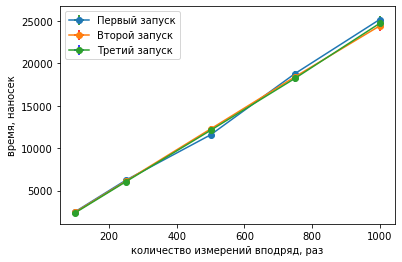

In [26]:
plt.figure()
plt.errorbar(m21_x, m21_y, xerr=0, yerr=m21_e, fmt='o-', ecolor='green', label = 'Первый запуск')
plt.errorbar(m22_x, m22_y, xerr=0, yerr=m22_e, fmt='o-', ecolor='red',   label = 'Второй запуск')
plt.errorbar(m23_x, m23_y, xerr=0, yerr=m23_e, fmt='o-', ecolor='blue',  label = 'Третий запуск')
plt.xlabel("количество измерений вподряд, раз")
plt.ylabel("время, наносек")
plt.legend()
plt.show()

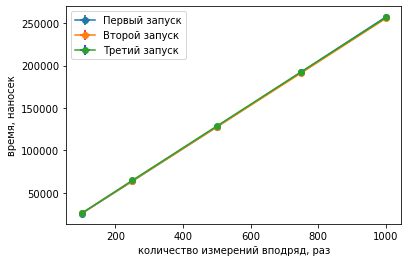

In [27]:
plt.figure()
plt.errorbar(m11_x, m11_y, xerr=0, yerr=m11_e, fmt='o-', ecolor='green', label = 'Первый запуск')
plt.errorbar(m12_x, m12_y, xerr=0, yerr=m12_e, fmt='o-', ecolor='red',   label = 'Второй запуск')
plt.errorbar(m13_x, m13_y, xerr=0, yerr=m13_e, fmt='o-', ecolor='blue',  label = 'Третий запуск')
plt.xlabel("количество измерений вподряд, раз")
plt.ylabel("время, наносек")
plt.legend()
plt.show()

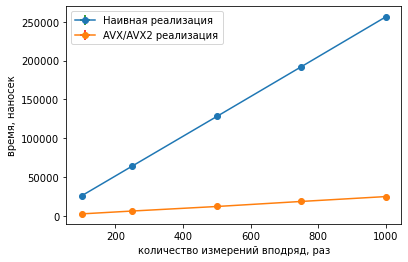

In [28]:
plt.figure()
plt.errorbar(m1_x, m1_y, xerr=0, yerr=m1_error, fmt='o-', ecolor='green', label = 'Наивная реализация')
plt.errorbar(m2_x, m2_y, xerr=0, yerr=m2_error, fmt='o-', ecolor='red', label = 'AVX/AVX2 реализация')
plt.xlabel("количество измерений вподряд, раз")
plt.ylabel("время, наносек")
plt.legend()
plt.show()

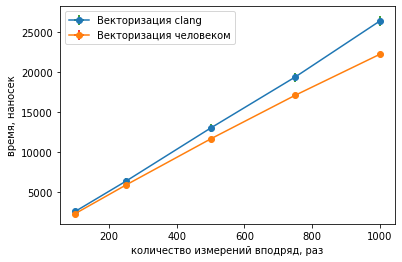

In [34]:
plt.figure()
plt.errorbar(m14_x, m14_y, xerr=0, yerr=m1_error, fmt='o-', ecolor='green', label = 'Векторизация clang')
plt.errorbar(m24_x, m24_y, xerr=0, yerr=m2_error, fmt='o-', ecolor='red', label = 'Векторизация человеком')
plt.xlabel("количество измерений вподряд, раз")
plt.ylabel("время, наносек")
plt.legend()
plt.show()

## Вычисление угловых коэффициентов

In [29]:
p1 = numpy.polyfit(m1_x, m1_y, 1)
p2 = numpy.polyfit(m2_x, m2_y, 1)

print('k1 = ', p1[0], ', k2 = ', p2[0])
print('b1 = ', p1[1], ', b2 = ', p2[1])
print('k1 / k2 = ', p1[0] / p2[0])

k1 =  256.34968105065667 , k2 =  24.79121325828644
b1 =  64.03252032525508 , b2 =  -124.76422764227492
k1 / k2 =  10.340344313926307
